In [ ]:
# Notebook specific shim code - you can ignore this section. All this does
# is load the code directory so we can import functions from it, set up 
# the graphing and import some modules only used in this notebook. 
%matplotlib notebook 
# auto 
# inline

import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
codedir = parentdir + "/code"
sys.path.insert(0, codedir) 

import json
import pickle

import ipywidgets as widgets

from matplotlib import pyplot

import cv2
import numpy
import scipy

import skimage.draw

from skimage.morphology import disk, white_tophat

from cells.edge import segments
from cells.edge import classify

import cells.images.filter
import cells.waypoints.perimeter
import cells.waypoints.seeding

In [ ]:
# Change this project name to the name of your current project
project_name = "adam_first_test"

# Change this filename to change the image that will be loaded
image_file_name = "2020.07.08 DF19 iBMECs 1 kpa_08 - GFP.vsi.tif"

if "TxRed" in image_file_name:
    reference_image_file_name = image_file_name.replace("TxRed", "GFP")
else:
    reference_image_file_name = image_file_name

project_directory = os.path.join(parentdir, "data", "projects", project_name)

# Load Image
images_directory = os.path.join(project_directory, "input", "images")
image_file = os.path.join(images_directory, image_file_name)
input_image = cv2.imread(image_file)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Filter image, generate useful images
#input_image = cells.images.filter.remove_legend(input_image)
image_intensity = cells.images.filter.convert_intensity(input_image)
cost_image = cells.images.filter.generate_cost_image(image_intensity)

# Load Waypoints
waypoints_directory = os.path.join(project_directory, "artifacts", "waypoints")
current_wp_filename = reference_image_file_name + ".tsv"
current_wp_file = os.path.join(waypoints_directory, current_wp_filename)
image_waypoints = cells.waypoints.seeding.load_waypoints(current_wp_file)

waypoints_collection = []
for iwp in image_waypoints:
    waypoints_collection.append(iwp.get("waypoints"))
    
# Show image and annotate centers
pyplot.figure(1)
pyplot.title('Labeled Image')
pyplot.imshow(input_image)
for cell_idx in range(0, len(image_waypoints)):
    r, c = image_waypoints[cell_idx].get("geometric_center")
    label = "Cell %s [%s, %s]" % (str(cell_idx), str(r), str(c))
    pyplot.annotate(label, [c, r], color="white")
pyplot.show()    

In [ ]:
# You can change this value to whatever cell you want
selected_cell = 0

print "Cell Center: ", image_waypoints[selected_cell].get("geometric_center")

In [ ]:
waypoints = numpy.asarray(image_waypoints[selected_cell].get("waypoints"))

r_cell_min, r_cell_max = numpy.min(waypoints[:, 0]), numpy.max(waypoints[:, 0])
c_cell_min, c_cell_max = numpy.min(waypoints[:, 1]), numpy.max(waypoints[:, 1])

i_r_max, i_c_max, depth = input_image.shape
frame_r_min, frame_r_max = max([r_cell_min - 50, 0]), min([r_cell_max + 50, i_r_max])
frame_c_min, frame_c_max = max([c_cell_min - 50, 0]), min([c_cell_max + 50, i_c_max])

pyplot.figure(2)
pyplot.title('Cell of Interest')
pyplot.imshow(input_image[frame_r_min:frame_r_max, frame_c_min:frame_c_max])
pyplot.show()

In [ ]:
#filter_threshold = 15 #15 for GFP, 3 for TxRed

if "TxRed" in image_file_name:
    filter_threshold = 3
else:
    filter_threshold = 15

selem = disk(5)
image_processed = white_tophat(image_intensity, selem)


plotter = numpy.zeros(input_image.shape, dtype=numpy.uint8)
plotter[image_processed > filter_threshold] = input_image[image_processed > filter_threshold]

pyplot.figure(3)
pyplot.title('Filtered Image')
pyplot.imshow(plotter)

Perimeter1 (pixels):  1030
Perimeter2 (pixels):  1030


<IPython.core.display.Javascript object>


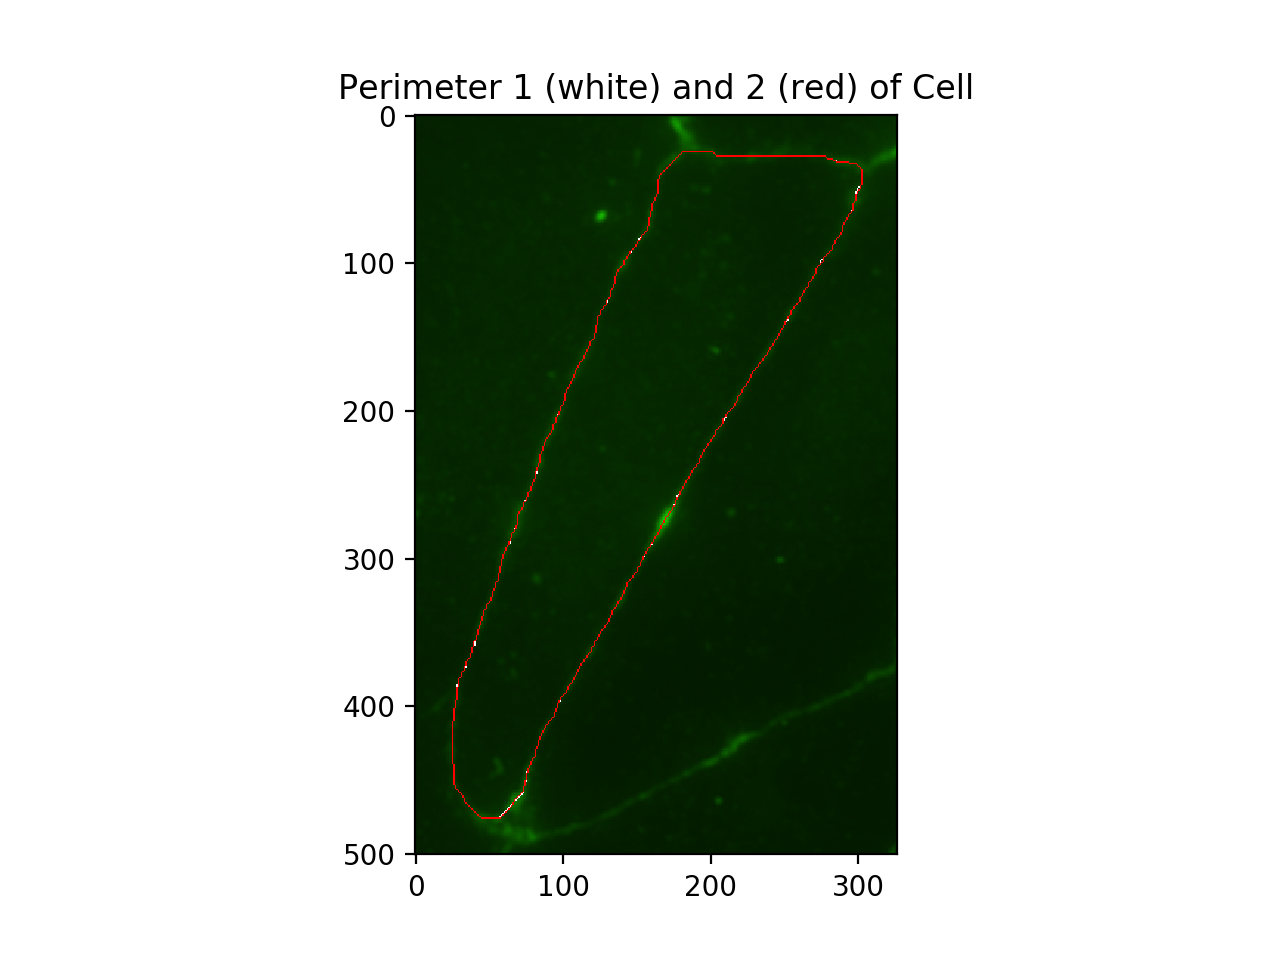

In [19]:
waypoints = numpy.asarray(image_waypoints[selected_cell].get("waypoints"))
perimeter1 = cells.waypoints.perimeter.get_perimeter(cost_image, waypoints)
perimeter2 = [[1662, 933], [1662, 932], [1662, 931], [1662, 930], [1662, 929], [1662, 928], [1662, 927], [1662, 926], [1662, 925], [1662, 924], [1662, 923], [1662, 922], [1662, 921], [1661, 920], [1661, 919], [1660, 918], [1659, 917], [1658, 916], [1657, 915], [1656, 914], [1655, 913], [1654, 912], [1653, 911], [1652, 910], [1652, 910], [1651, 909], [1650, 909], [1649, 909], [1648, 908], [1647, 908], [1646, 907], [1645, 906], [1644, 905], [1643, 904], [1642, 903], [1641, 903], [1640, 903], [1639, 902], [1638, 902], [1637, 902], [1636, 902], [1635, 902], [1634, 902], [1633, 902], [1632, 902], [1631, 902], [1630, 902], [1629, 902], [1628, 902], [1627, 902], [1626, 902], [1625, 901], [1624, 901], [1623, 901], [1622, 901], [1621, 901], [1620, 901], [1619, 901], [1618, 901], [1617, 901], [1616, 901], [1615, 901], [1614, 901], [1613, 901], [1612, 901], [1611, 901], [1610, 901], [1609, 901], [1608, 901], [1607, 901], [1606, 901], [1605, 901], [1604, 901], [1603, 901], [1602, 901], [1601, 901], [1600, 901], [1599, 901], [1598, 901], [1597, 901], [1597, 901], [1596, 902], [1595, 902], [1594, 902], [1593, 902], [1592, 902], [1591, 902], [1590, 902], [1589, 902], [1588, 902], [1587, 903], [1586, 903], [1585, 903], [1584, 903], [1583, 903], [1582, 904], [1581, 904], [1580, 904], [1579, 904], [1578, 904], [1577, 904], [1576, 904], [1575, 904], [1574, 904], [1573, 905], [1572, 905], [1571, 905], [1570, 905], [1569, 905], [1568, 905], [1567, 906], [1566, 907], [1565, 907], [1564, 907], [1563, 908], [1562, 909], [1561, 909], [1560, 909], [1559, 910], [1558, 910], [1557, 910], [1556, 910], [1555, 911], [1554, 912], [1553, 913], [1552, 913], [1551, 913], [1550, 914], [1549, 914], [1548, 914], [1547, 914], [1546, 915], [1545, 915], [1544, 915], [1543, 915], [1542, 916], [1541, 917], [1540, 917], [1539, 917], [1538, 918], [1537, 918], [1536, 918], [1535, 918], [1534, 919], [1533, 919], [1532, 919], [1531, 920], [1530, 920], [1529, 920], [1528, 921], [1527, 921], [1526, 921], [1525, 922], [1524, 922], [1523, 922], [1522, 922], [1521, 923], [1520, 924], [1519, 924], [1518, 924], [1517, 925], [1516, 926], [1515, 927], [1514, 927], [1513, 927], [1512, 928], [1511, 928], [1510, 928], [1509, 928], [1508, 929], [1507, 929], [1506, 930], [1505, 930], [1504, 930], [1503, 930], [1502, 931], [1501, 932], [1500, 932], [1499, 932], [1498, 932], [1497, 932], [1496, 933], [1495, 933], [1494, 933], [1493, 933], [1492, 933], [1491, 934], [1490, 934], [1489, 934], [1488, 934], [1487, 934], [1486, 935], [1485, 935], [1484, 935], [1483, 936], [1482, 936], [1481, 937], [1480, 937], [1479, 937], [1478, 938], [1477, 939], [1476, 939], [1475, 939], [1474, 940], [1473, 940], [1472, 941], [1471, 941], [1470, 941], [1469, 942], [1468, 943], [1467, 943], [1466, 944], [1465, 944], [1464, 944], [1463, 945], [1462, 945], [1461, 945], [1460, 945], [1459, 945], [1458, 945], [1457, 945], [1456, 946], [1455, 946], [1454, 947], [1453, 948], [1452, 948], [1451, 949], [1450, 949], [1449, 949], [1448, 950], [1447, 951], [1446, 951], [1445, 951], [1444, 952], [1443, 952], [1442, 952], [1441, 953], [1440, 954], [1439, 954], [1438, 954], [1437, 955], [1436, 955], [1435, 955], [1434, 956], [1433, 956], [1432, 957], [1431, 957], [1430, 957], [1429, 957], [1428, 957], [1427, 958], [1426, 958], [1425, 958], [1424, 959], [1423, 959], [1422, 959], [1421, 960], [1420, 960], [1419, 960], [1418, 960], [1417, 960], [1416, 960], [1415, 961], [1414, 961], [1413, 962], [1412, 962], [1411, 962], [1410, 963], [1409, 963], [1408, 963], [1407, 964], [1406, 964], [1405, 965], [1404, 966], [1403, 966], [1402, 967], [1401, 968], [1400, 968], [1399, 969], [1398, 969], [1397, 969], [1396, 969], [1395, 970], [1394, 971], [1393, 971], [1392, 971], [1391, 971], [1390, 972], [1389, 973], [1388, 973], [1387, 973], [1386, 974], [1385, 974], [1384, 974], [1383, 975], [1382, 976], [1381, 976], [1380, 976], [1379, 977], [1378, 977], [1377, 977], [1376, 977], [1375, 977], [1374, 978], [1373, 978], [1372, 978], [1371, 979], [1370, 980], [1369, 980], [1368, 981], [1367, 981], [1366, 982], [1365, 982], [1364, 983], [1363, 983], [1362, 983], [1361, 984], [1360, 984], [1359, 984], [1358, 985], [1357, 986], [1356, 986], [1355, 987], [1354, 987], [1353, 988], [1352, 989], [1351, 990], [1350, 990], [1349, 990], [1348, 991], [1347, 991], [1346, 992], [1345, 992], [1344, 993], [1343, 993], [1342, 994], [1341, 994], [1340, 994], [1339, 995], [1338, 996], [1337, 997], [1336, 997], [1335, 997], [1334, 997], [1333, 998], [1332, 998], [1331, 998], [1330, 998], [1329, 998], [1328, 999], [1327, 999], [1326, 999], [1325, 999], [1324, 999], [1323, 999], [1322, 1000], [1321, 1001], [1320, 1001], [1319, 1001], [1318, 1002], [1317, 1003], [1316, 1003], [1315, 1004], [1314, 1005], [1313, 1005], [1312, 1005], [1311, 1006], [1310, 1007], [1309, 1008], [1308, 1008], [1307, 1008], [1306, 1008], [1305, 1008], [1304, 1009], [1303, 1010], [1302, 1010], [1301, 1010], [1300, 1011], [1299, 1011], [1298, 1011], [1297, 1011], [1296, 1011], [1295, 1012], [1294, 1012], [1293, 1012], [1292, 1013], [1291, 1013], [1290, 1014], [1289, 1015], [1288, 1016], [1287, 1017], [1286, 1017], [1285, 1017], [1284, 1018], [1283, 1019], [1282, 1019], [1281, 1020], [1280, 1021], [1279, 1021], [1278, 1022], [1277, 1023], [1276, 1024], [1275, 1025], [1274, 1025], [1273, 1026], [1272, 1026], [1271, 1027], [1270, 1028], [1269, 1029], [1268, 1029], [1267, 1030], [1266, 1031], [1265, 1032], [1264, 1033], [1263, 1033], [1262, 1033], [1261, 1034], [1260, 1034], [1259, 1034], [1258, 1034], [1257, 1034], [1256, 1034], [1255, 1035], [1254, 1035], [1253, 1035], [1252, 1035], [1251, 1036], [1250, 1036], [1249, 1036], [1248, 1036], [1247, 1036], [1246, 1036], [1245, 1037], [1244, 1038], [1243, 1038], [1242, 1038], [1241, 1039], [1240, 1039], [1239, 1040], [1238, 1040], [1237, 1040], [1236, 1040], [1235, 1040], [1234, 1040], [1233, 1040], [1232, 1040], [1231, 1040], [1230, 1040], [1229, 1041], [1228, 1041], [1227, 1041], [1226, 1042], [1225, 1043], [1224, 1044], [1223, 1045], [1222, 1046], [1221, 1047], [1220, 1048], [1219, 1049], [1218, 1050], [1217, 1051], [1216, 1052], [1215, 1053], [1214, 1054], [1213, 1055], [1212, 1056], [1211, 1057], [1211, 1057], [1211, 1058], [1211, 1059], [1211, 1060], [1211, 1061], [1211, 1062], [1211, 1063], [1211, 1064], [1211, 1065], [1211, 1066], [1211, 1067], [1211, 1068], [1211, 1069], [1211, 1070], [1211, 1071], [1211, 1072], [1211, 1073], [1211, 1074], [1211, 1075], [1211, 1076], [1211, 1077], [1212, 1078], [1213, 1079], [1214, 1080], [1214, 1081], [1214, 1082], [1214, 1083], [1214, 1084], [1214, 1085], [1214, 1086], [1214, 1087], [1214, 1088], [1214, 1089], [1214, 1090], [1214, 1091], [1214, 1092], [1214, 1093], [1214, 1094], [1214, 1095], [1214, 1096], [1214, 1097], [1214, 1098], [1214, 1099], [1214, 1100], [1214, 1101], [1214, 1102], [1214, 1103], [1214, 1104], [1214, 1105], [1214, 1106], [1214, 1107], [1214, 1108], [1214, 1109], [1214, 1110], [1214, 1111], [1214, 1112], [1214, 1113], [1214, 1114], [1214, 1115], [1214, 1116], [1214, 1117], [1214, 1118], [1214, 1119], [1214, 1120], [1214, 1121], [1214, 1122], [1214, 1123], [1214, 1124], [1214, 1125], [1214, 1126], [1214, 1127], [1214, 1128], [1214, 1129], [1214, 1130], [1214, 1131], [1214, 1132], [1214, 1133], [1214, 1134], [1214, 1135], [1214, 1136], [1214, 1137], [1214, 1138], [1214, 1139], [1214, 1140], [1214, 1141], [1214, 1142], [1214, 1143], [1214, 1144], [1214, 1145], [1214, 1146], [1214, 1147], [1214, 1148], [1214, 1149], [1214, 1150], [1214, 1151], [1214, 1152], [1214, 1153], [1215, 1154], [1216, 1155], [1216, 1156], [1216, 1157], [1216, 1158], [1217, 1159], [1217, 1160], [1218, 1161], [1218, 1162], [1218, 1163], [1218, 1164], [1218, 1165], [1218, 1166], [1218, 1167], [1218, 1168], [1218, 1169], [1219, 1170], [1219, 1171], [1219, 1172], [1219, 1173], [1219, 1174], [1220, 1175], [1221, 1176], [1222, 1177], [1223, 1178], [1223, 1178], [1224, 1178], [1225, 1178], [1226, 1178], [1227, 1178], [1228, 1178], [1229, 1178], [1230, 1178], [1231, 1178], [1232, 1178], [1233, 1178], [1234, 1177], [1235, 1177], [1236, 1177], [1237, 1176], [1238, 1175], [1239, 1175], [1240, 1174], [1241, 1174], [1242, 1174], [1243, 1174], [1244, 1174], [1245, 1173], [1246, 1172], [1247, 1172], [1248, 1172], [1249, 1172], [1250, 1172], [1251, 1172], [1252, 1171], [1253, 1170], [1254, 1169], [1255, 1169], [1256, 1168], [1257, 1168], [1258, 1167], [1259, 1166], [1260, 1166], [1261, 1165], [1262, 1165], [1263, 1165], [1264, 1165], [1265, 1165], [1266, 1164], [1267, 1164], [1268, 1163], [1269, 1162], [1270, 1161], [1271, 1160], [1272, 1160], [1273, 1160], [1274, 1159], [1275, 1158], [1276, 1158], [1277, 1158], [1278, 1157], [1279, 1156], [1280, 1155], [1281, 1154], [1282, 1153], [1283, 1152], [1284, 1152], [1285, 1152], [1286, 1151], [1287, 1150], [1288, 1149], [1289, 1148], [1290, 1147], [1291, 1147], [1292, 1147], [1293, 1147], [1294, 1146], [1295, 1146], [1296, 1145], [1297, 1145], [1298, 1144], [1299, 1143], [1300, 1142], [1301, 1142], [1302, 1142], [1303, 1141], [1304, 1140], [1305, 1139], [1306, 1139], [1307, 1138], [1308, 1138], [1309, 1137], [1310, 1136], [1311, 1136], [1312, 1136], [1313, 1135], [1314, 1134], [1315, 1133], [1316, 1132], [1317, 1132], [1318, 1131], [1319, 1130], [1320, 1130], [1321, 1130], [1322, 1129], [1323, 1128], [1324, 1128], [1325, 1127], [1326, 1126], [1327, 1126], [1328, 1126], [1329, 1125], [1330, 1125], [1331, 1124], [1332, 1123], [1333, 1123], [1334, 1122], [1335, 1122], [1336, 1121], [1337, 1121], [1338, 1120], [1339, 1119], [1340, 1119], [1341, 1118], [1342, 1118], [1343, 1117], [1344, 1116], [1345, 1116], [1346, 1115], [1347, 1114], [1348, 1114], [1349, 1113], [1350, 1112], [1351, 1111], [1352, 1111], [1353, 1110], [1354, 1109], [1355, 1108], [1356, 1108], [1357, 1107], [1358, 1106], [1359, 1105], [1360, 1104], [1361, 1104], [1362, 1103], [1363, 1103], [1364, 1103], [1365, 1102], [1366, 1102], [1367, 1101], [1368, 1100], [1369, 1100], [1370, 1099], [1371, 1098], [1372, 1097], [1373, 1097], [1374, 1097], [1375, 1096], [1376, 1095], [1377, 1094], [1378, 1094], [1379, 1094], [1380, 1093], [1381, 1093], [1382, 1092], [1383, 1092], [1384, 1091], [1385, 1090], [1386, 1089], [1387, 1088], [1388, 1087], [1389, 1086], [1390, 1086], [1391, 1085], [1392, 1084], [1393, 1084], [1394, 1084], [1395, 1084], [1396, 1083], [1397, 1082], [1398, 1081], [1399, 1080], [1400, 1079], [1401, 1079], [1402, 1079], [1403, 1078], [1404, 1078], [1405, 1077], [1406, 1076], [1407, 1076], [1408, 1075], [1409, 1074], [1410, 1074], [1411, 1073], [1412, 1072], [1413, 1071], [1414, 1071], [1415, 1070], [1416, 1070], [1417, 1069], [1418, 1069], [1419, 1068], [1420, 1068], [1421, 1068], [1422, 1067], [1423, 1066], [1424, 1066], [1425, 1065], [1426, 1064], [1427, 1063], [1428, 1063], [1429, 1062], [1430, 1062], [1431, 1061], [1432, 1061], [1433, 1060], [1434, 1059], [1435, 1059], [1436, 1058], [1437, 1058], [1438, 1057], [1439, 1057], [1440, 1056], [1441, 1055], [1442, 1055], [1443, 1055], [1444, 1054], [1445, 1053], [1446, 1053], [1447, 1052], [1448, 1052], [1449, 1052], [1450, 1052], [1451, 1051], [1452, 1050], [1453, 1050], [1454, 1049], [1455, 1048], [1456, 1047], [1457, 1047], [1458, 1046], [1459, 1045], [1460, 1045], [1461, 1044], [1462, 1044], [1463, 1043], [1464, 1042], [1465, 1042], [1466, 1042], [1467, 1041], [1468, 1041], [1469, 1040], [1470, 1040], [1471, 1039], [1472, 1038], [1473, 1038], [1474, 1037], [1475, 1037], [1476, 1036], [1477, 1035], [1478, 1035], [1479, 1034], [1480, 1033], [1481, 1033], [1482, 1032], [1483, 1032], [1484, 1031], [1485, 1030], [1486, 1030], [1487, 1030], [1488, 1029], [1489, 1028], [1490, 1028], [1491, 1028], [1492, 1027], [1493, 1026], [1494, 1026], [1495, 1026], [1496, 1025], [1497, 1024], [1498, 1023], [1499, 1023], [1500, 1022], [1501, 1021], [1502, 1020], [1503, 1019], [1504, 1019], [1505, 1019], [1506, 1018], [1507, 1018], [1508, 1017], [1509, 1017], [1510, 1017], [1511, 1016], [1512, 1016], [1513, 1015], [1514, 1015], [1515, 1014], [1516, 1013], [1517, 1013], [1518, 1012], [1519, 1012], [1520, 1011], [1521, 1010], [1522, 1009], [1523, 1009], [1524, 1009], [1525, 1008], [1526, 1008], [1527, 1007], [1528, 1007], [1529, 1007], [1530, 1006], [1531, 1005], [1532, 1004], [1533, 1004], [1534, 1003], [1535, 1002], [1536, 1001], [1537, 1001], [1538, 1000], [1539, 1000], [1540, 999], [1541, 999], [1542, 998], [1543, 997], [1544, 997], [1545, 997], [1546, 996], [1547, 995], [1548, 995], [1549, 995], [1550, 994], [1551, 993], [1552, 992], [1553, 992], [1554, 991], [1555, 990], [1556, 990], [1557, 989], [1558, 988], [1559, 988], [1560, 987], [1561, 987], [1562, 986], [1563, 986], [1564, 985], [1565, 985], [1566, 984], [1567, 983], [1568, 983], [1569, 982], [1570, 982], [1571, 981], [1572, 980], [1573, 979], [1574, 979], [1575, 979], [1576, 978], [1577, 978], [1578, 977], [1579, 976], [1580, 975], [1581, 974], [1582, 974], [1583, 973], [1584, 973], [1585, 972], [1586, 972], [1587, 972], [1588, 971], [1589, 971], [1590, 971], [1591, 970], [1592, 970], [1593, 970], [1594, 969], [1595, 968], [1596, 967], [1597, 966], [1598, 966], [1599, 965], [1600, 964], [1601, 964], [1602, 963], [1603, 962], [1604, 962], [1605, 961], [1606, 961], [1607, 960], [1608, 960], [1609, 960], [1610, 959], [1611, 959], [1612, 959], [1613, 959], [1614, 958], [1615, 958], [1616, 957], [1617, 957], [1618, 957], [1619, 957], [1620, 957], [1621, 956], [1622, 955], [1623, 955], [1624, 954], [1625, 954], [1626, 954], [1627, 953], [1628, 953], [1629, 952], [1630, 952], [1631, 952], [1632, 951], [1633, 951], [1634, 951], [1635, 951], [1636, 951], [1637, 950], [1638, 950], [1639, 950], [1640, 950], [1641, 949], [1642, 949], [1643, 949], [1644, 949], [1645, 948], [1646, 947], [1647, 946], [1648, 945], [1649, 944], [1650, 943], [1651, 943], [1652, 942], [1653, 942], [1654, 941], [1655, 940], [1656, 939], [1657, 938], [1658, 937], [1659, 936], [1660, 935], [1661, 934], [1662, 933], [1662, 933]]
r_cell_min, r_cell_max = numpy.min(waypoints[:, 0]), numpy.max(waypoints[:, 0])
c_cell_min, c_cell_max = numpy.min(waypoints[:, 1]), numpy.max(waypoints[:, 1])

i_r_max, i_c_max, depth = input_image.shape
frame_r_min, frame_r_max = max([r_cell_min - 25, 0]), min([r_cell_max + 25, i_r_max])
frame_c_min, frame_c_max = max([c_cell_min - 25, 0]), min([c_cell_max + 25, i_c_max])

plotter = input_image.copy()

path1 = numpy.asarray(perimeter1)
path2 = numpy.asarray(perimeter2)

for e in path1:
    r1, c1 = e
    
    thickness_radius = 1 # Change me
    rr1, cc1 = skimage.draw.circle(r1, c1, thickness_radius)
    skimage.draw.set_color(plotter, (rr1, cc1), (255, 255, 255))


for e in path2:
    r2, c2 = e
    
    thickness_radius = 1 # Change me
    rr2, cc2 = skimage.draw.circle(r2, c2, thickness_radius)
    skimage.draw.set_color(plotter, (rr2, cc2), (255, 0, 0))
    

    
print "Perimeter1 (pixels): ", len(perimeter1)
print "Perimeter2 (pixels): ", len(perimeter2)

pyplot.figure(4)
pyplot.title('Perimeter 1 (white) and 2 (red) of Cell')
pyplot.imshow(plotter[frame_r_min:frame_r_max, frame_c_min:frame_c_max])
pyplot.show()


In [ ]:
import math
import scipy.spatial
import skimage.draw
import skimage.measure

path = numpy.asarray(perimeter1)

hull = scipy.spatial.ConvexHull(path)
hull_indices = numpy.unique(hull.simplices.flat)

hull_points = path[hull_indices, :]

centroid = (sum([p[0] for p in hull_points])/len(hull_points),
            sum([p[1] for p in hull_points])/len(hull_points))

sorted_hull_points = \
    sorted(hull_points,
           key=lambda p: math.atan2(p[1]-centroid[1], p[0]-centroid[0]))

hull_point_array = numpy.asarray(sorted_hull_points)
    
ellipse_hull = skimage.measure.EllipseModel()
ellipse_hull.estimate(hull_point_array)

xc, yc, a, b, theta = ellipse_hull.params

print "Hull Based Fitted Ellipse Center: [%s, %s]" % (str(yc), str(xc))
print "Hull Based Fitted Ellipse Theta (Offset Angle): %s" % (str(theta))
print "Hull Based Fitted Ellipse axis lengths: %s, %s" % (str(a), str(b))
print "Hull Based Aspect Ratio: %s" % str(float(a) / float(b))

a_p1 = xc + a*math.cos(theta), yc + a*math.sin(theta)
a_p2 = xc - a*math.cos(theta), yc - a*math.sin(theta)
b_p1 = xc - b*math.sin(theta), yc + b*math.cos(theta)
b_p2 = xc + b*math.sin(theta), yc - b*math.cos(theta)

pyplot.figure(7)
pyplot.title('Path 1 Ellipse +  Major and Minor Axes')
pyplot.imshow(input_image)

pyplot.plot([a_p1[1], a_p2[1]], [a_p1[0], a_p2[0]], 'y') #Change y to change color 
pyplot.plot([b_p1[1], b_p2[1]], [b_p1[0], b_p2[0]], 'c') #Change c to change color 

import math

theta_matrix = numpy.array([[math.sin(theta) , -math.cos(theta)], [math.cos(theta), math.sin(theta)]])  

para_t = numpy.linspace(0, 2*math.pi, 100)
norm_ellipse = numpy.array([a * numpy.cos(para_t), b*numpy.sin(para_t)])

ellipse = numpy.zeros((2, norm_ellipse.shape[1]))
for i in range(norm_ellipse.shape[1]):
    ellipse[:,i] = numpy.dot(theta_matrix, norm_ellipse[:,i])
    
pyplot.plot(yc + ellipse[0,:], xc + ellipse[1,:], 'w')

pyplot.show()

Hull Based Fitted Ellipse Center: [8916.33694958, 12648.5618531]
Hull Based Fitted Ellipse Theta (Offset Angle): 0.607095418018
Hull Based Fitted Ellipse axis lengths: 13858.4682073, 1505.40208365
Hull Based Aspect Ratio: 9.20582504685


<IPython.core.display.Javascript object>


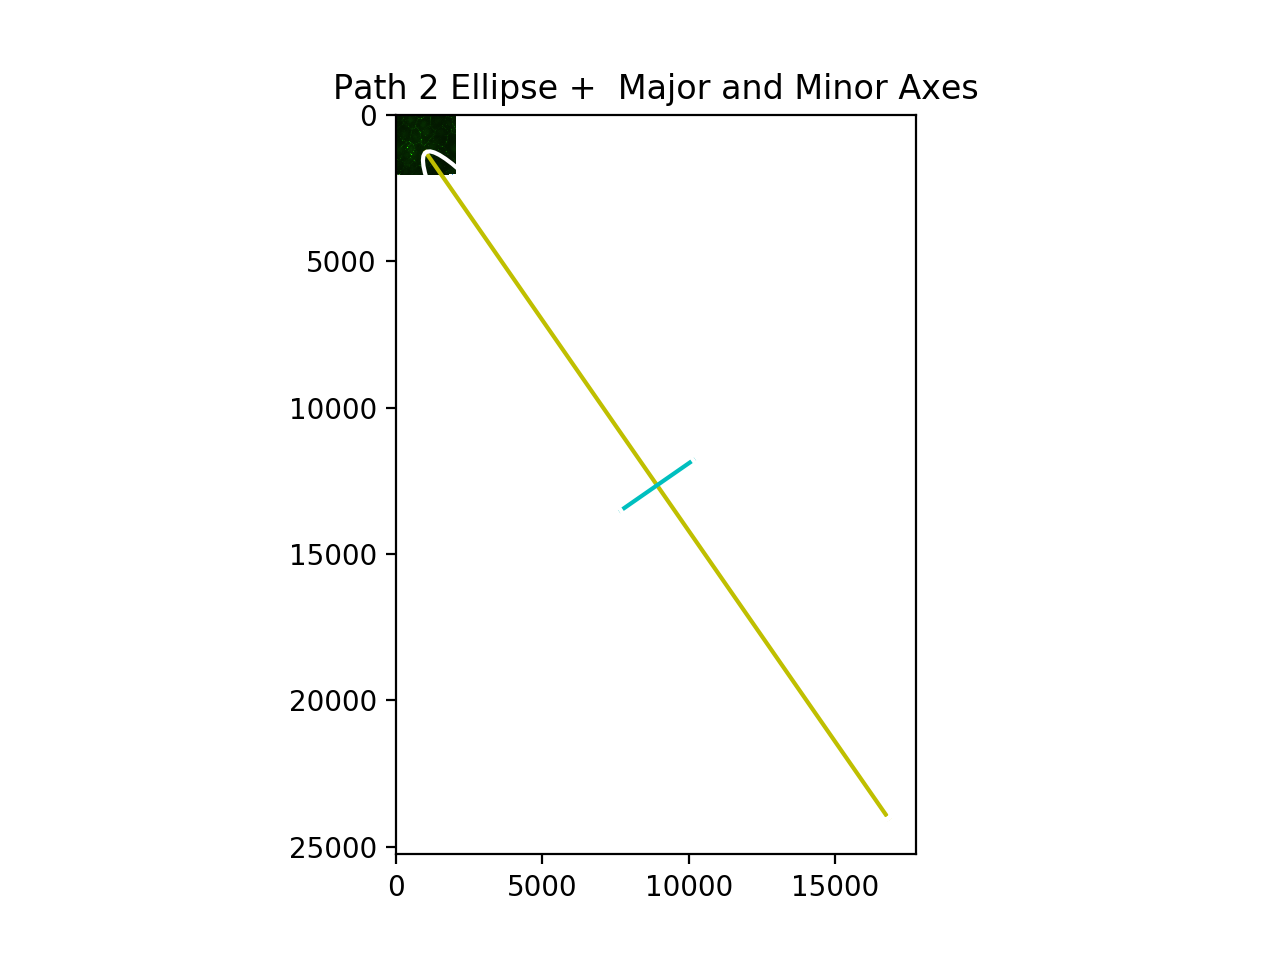

In [28]:
import math
import scipy.spatial
import skimage.draw
import skimage.measure

path = numpy.asarray(perimeter2)

hull = scipy.spatial.ConvexHull(path)
hull_indices = numpy.unique(hull.simplices.flat)

hull_points = path[hull_indices, :]

centroid = (sum([p[0] for p in hull_points])/len(hull_points),
            sum([p[1] for p in hull_points])/len(hull_points))

sorted_hull_points = \
    sorted(hull_points,
           key=lambda p: math.atan2(p[1]-centroid[1], p[0]-centroid[0]))

hull_point_array = numpy.asarray(sorted_hull_points)
    
ellipse_hull = skimage.measure.EllipseModel()
ellipse_hull.estimate(hull_point_array)

xc, yc, a, b, theta = ellipse_hull.params

print "Hull Based Fitted Ellipse Center: [%s, %s]" % (str(yc), str(xc))
print "Hull Based Fitted Ellipse Theta (Offset Angle): %s" % (str(theta))
print "Hull Based Fitted Ellipse axis lengths: %s, %s" % (str(a), str(b))
print "Hull Based Aspect Ratio: %s" % str(float(a) / float(b))

a_p1 = xc + a*math.cos(theta), yc + a*math.sin(theta)
a_p2 = xc - a*math.cos(theta), yc - a*math.sin(theta)
b_p1 = xc - b*math.sin(theta), yc + b*math.cos(theta)
b_p2 = xc + b*math.sin(theta), yc - b*math.cos(theta)

pyplot.figure(6)
pyplot.title('Path 2 Ellipse +  Major and Minor Axes')
pyplot.imshow(input_image)

pyplot.plot([a_p1[1], a_p2[1]], [a_p1[0], a_p2[0]], 'y') #Change y to change color 
pyplot.plot([b_p1[1], b_p2[1]], [b_p1[0], b_p2[0]], 'c') #Change c to change color 

import math

theta_matrix = numpy.array([[math.sin(theta) , -math.cos(theta)], [math.cos(theta), math.sin(theta)]])  

para_t = numpy.linspace(0, 2*math.pi, 100)
norm_ellipse = numpy.array([a * numpy.cos(para_t), b*numpy.sin(para_t)])

ellipse = numpy.zeros((2, norm_ellipse.shape[1]))
for i in range(norm_ellipse.shape[1]):
    ellipse[:,i] = numpy.dot(theta_matrix, norm_ellipse[:,i])
    
pyplot.plot(yc + ellipse[0,:], xc + ellipse[1,:], 'w')

pyplot.show()